# Analysis of the greedy algorithms

In [14]:
from __future__ import annotations

import os
import sys
sys.path.append(os.path.join(os.getcwd(), ".."))

import json
from typing import List, Iterable

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from src.extra.io import save_plot

matplotlib.rcParams['font.family'] = "monospace"
%matplotlib inline

In [15]:
for filename in os.listdir('../data'):
    if 'greedy' in filename:
        with open(f'../data/{filename}') as file:
            json_data = json.load(file)
            print(f'{filename}: {len(json_data)}')

greedy_caroline_t40.json: 100
greedy_paper_r_t15_s3_dt07-26_08-10-07.json: 50
greedy_paper_r_t15_s3_dt07-27_08-49-33.json: 50
greedy_paper_r_t30_s6_dt07-26_08-10-07.json: 1
greedy_paper_r_t30_s6_dt07-27_13-24-29.json: 50
greedy_paper_r_t40_s8_dt07-14_15-06-16.json: 50
greedy_paper_r_t40_s8_dt07-26_08-10-07.json: 47
greedy_paper_r_t40_s8_dt07-27_20-02-19.json: 50


In [16]:
results_filename = '../data/greedy_paper_r_t30_s6_dt07-27_13-24-29.json'

with open(results_filename) as file:
    results_data = json.load(file)

In [17]:
algorithm_results = {}
for model_results in results_data:
    for algorithm, algorithm_result in model_results.items():
        if algorithm == 'model' or 'Deadline Percent' in algorithm:
            continue
        if algorithm in algorithm_results:
            algorithm_results[algorithm].append(algorithm_result)
        else:
            algorithm_results[algorithm] = [algorithm_result]
    
print(f'Number of algorithms: {len(algorithm_results)}')

Number of algorithms: 31


In [18]:
for algo, results in algorithm_results.items():
    print(f'Algo: {algo}, {np.mean([r["solve time"] for r in results])}')

Algo: Flexible Optimal, 150.034
Algo: Fixed Optimal, 150.041
Algo: Server Relaxed Flexible Optimal, 95.3752
Algo: Optimal DIA, 323.50856000000005
Algo: Greedy Utility / Sqrt Sum, Sum, Percent Sum, 3.90012
Algo: Greedy Utility / Sqrt Sum, Sum, Pow percent sum, 4.9518
Algo: Greedy Utility / Sqrt Sum, Product, Percent Sum, 3.8932800000000003
Algo: Greedy Utility / Sqrt Sum, Product, Pow percent sum, 4.94498
Algo: Greedy Utility / Sqrt Sum, Random, Percent Sum, 3.97288
Algo: Greedy Utility / Sqrt Sum, Random, Pow percent sum, 4.8835999999999995
Algo: Greedy Utility * deadline / Sum, Sum, Percent Sum, 3.799100000000001
Algo: Greedy Utility * deadline / Sum, Sum, Pow percent sum, 4.866200000000001
Algo: Greedy Utility * deadline / Sum, Product, Percent Sum, 3.84408
Algo: Greedy Utility * deadline / Sum, Product, Pow percent sum, 4.8699200000000005
Algo: Greedy Utility * deadline / Sum, Random, Percent Sum, 3.8555599999999997
Algo: Greedy Utility * deadline / Sum, Random, Pow percent sum, 4.8

## Greedy modular functions

In [19]:
algorithm_avg_results = [
    [
        algorithm,
        [r['social welfare'] for r in results], 
        [r['social welfare percent'] for r in results], 
        [r['percentage tasks allocated'] for r in results], 
        [np.mean(list(r['server storage used'].values())) for r in results],
        [np.mean(list(r['server computation used'].values())) for r in results],
        [np.mean(list(r['server bandwidth used'].values())) for r in results],
        [np.mean(list(r['server num tasks allocated'].values())) for r in results],
        np.mean([r['social welfare'] for r in results])
    ]
    for algorithm, results in algorithm_results.items()
]

algorithm_df = pd.DataFrame(algorithm_avg_results, columns=[
    'name', 'social welfare', 'social welfare percent', 'percentage tasks allocated', 
    'storage used',  'computation used', 'bandwidth used', 'num tasks allocated', 'avg social welfare'
])
algorithm_df = algorithm_df.sort_values(by='avg social welfare')

Text(0.5, 1.0, 'Percentage Tasks Allocated')

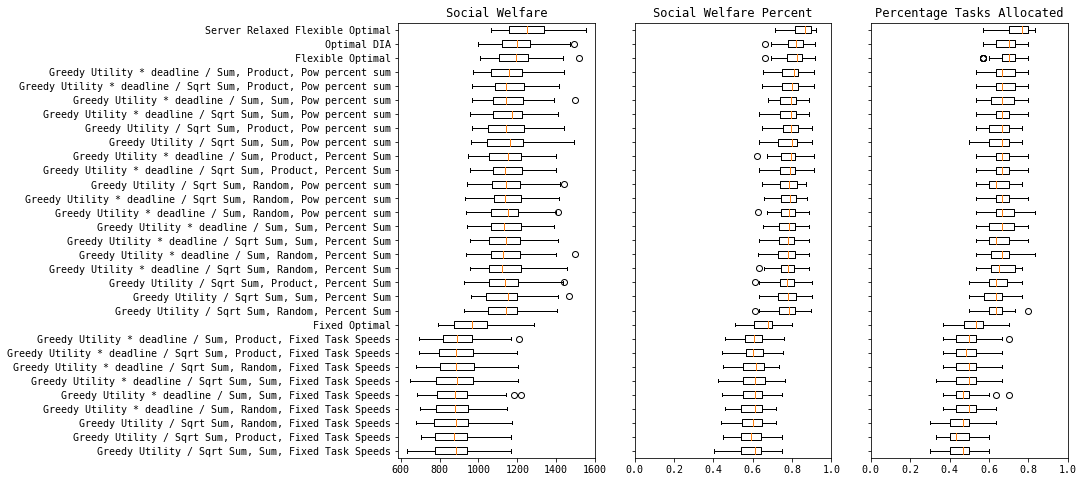

In [20]:
system_fig, (ax_sw, ax_swp, ax_pta) = plt.subplots(1, 3, figsize=(12, 8))
ax_sw.boxplot(algorithm_df['social welfare'], vert=False)
ax_sw.set_yticklabels(algorithm_df['name'])
ax_sw.set_title('Social Welfare')

ax_swp.boxplot(algorithm_df['social welfare percent'], vert=False)
plt.setp(ax_swp.get_yticklabels(), visible=False)
ax_swp.set_xticks(np.arange(0, 1.2, 0.2))
ax_swp.set_title('Social Welfare Percent')

ax_pta.boxplot(algorithm_df['percentage tasks allocated'], vert=False)
plt.setp(ax_pta.get_yticklabels(), visible=False)
ax_pta.set_xticks(np.arange(0, 1.2, 0.2))
ax_pta.set_title('Percentage Tasks Allocated')

Text(0.5, 1.0, 'Bandwidth Used')

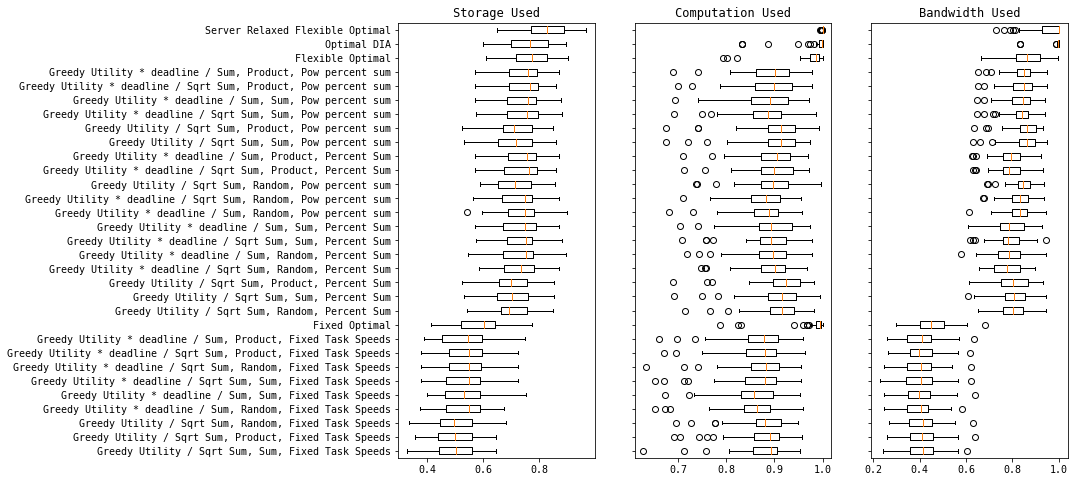

In [21]:
server_fig, (ax_storage_used, ax_computation_used, ax_bandwidth_used) = plt.subplots(1, 3, figsize=(12, 8))
ax_storage_used.boxplot(algorithm_df['storage used'], vert=False)
ax_storage_used.set_yticklabels(algorithm_df['name'])
ax_storage_used.set_title('Storage Used')

ax_computation_used.boxplot(algorithm_df['computation used'], vert=False)
plt.setp(ax_computation_used.get_yticklabels(), visible=False)
ax_computation_used.set_title('Computation Used')

ax_bandwidth_used.boxplot(algorithm_df['bandwidth used'], vert=False)
plt.setp(ax_bandwidth_used.get_yticklabels(), visible=False)
ax_bandwidth_used.set_title('Bandwidth Used')

## Percentage difference in algorithm results and optimal solutions

In [22]:
def difference(results_1, results_2):
    sw = []
    for r1, r2 in zip(results_1, results_2):
        sw.append(r1['social welfare'] / r2['social welfare'])
    return np.mean(sw),  sw

optimal_algorithm_results = algorithm_results['Flexible Optimal']
fixed_optimal_algorithm_results = algorithm_results['Fixed Optimal']
relaxed_optimal_algorithm_results = algorithm_results['Server Relaxed Flexible Optimal']
algorithm_difference_results = [
    [algorithm, 
     *difference(results, optimal_algorithm_results), 
     *difference(results, fixed_optimal_algorithm_results),
     *difference(results, relaxed_optimal_algorithm_results)]
    for algorithm, results in algorithm_results.items()
]

algo_diff_df = pd.DataFrame(algorithm_difference_results, columns=[
    'name', 'optimal sw diff', 'optimal sw diff list',
    'fixed optimal sw diff', 'fixed optimal sw diff list',
    'relaxed optimal sw diff', 'relaxed optimal sw diff list'
])
algo_diff_df = algo_diff_df.sort_values(by='optimal sw diff', ascending=False)

Text(0.5, 1.0, 'Difference to Relaxed Optimal')

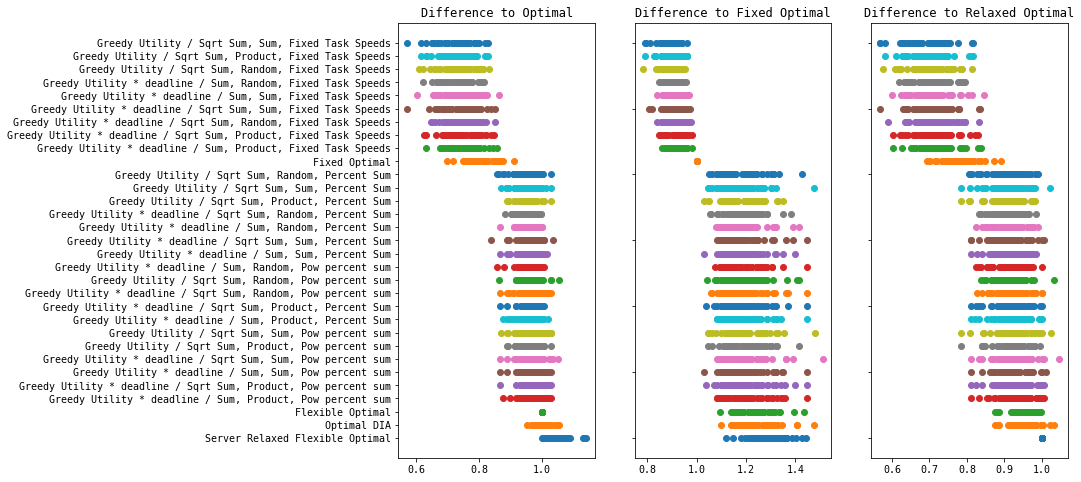

In [23]:
diff_fig, (ax_optimal_sw_points, fixed_optimal_sw_points, relaxed_optimal_sw_points) = plt.subplots(1, 3, figsize=(12,8))
for pos, (optimal_list, fixed_list, relaxed_list) in enumerate(
    algo_diff_df[['optimal sw diff list', 'fixed optimal sw diff list', 'relaxed optimal sw diff list']].values):
    ax_optimal_sw_points.scatter(optimal_list, np.ones(len(optimal_list)) * pos)
    fixed_optimal_sw_points.scatter(fixed_list, np.ones(len(fixed_list)) * pos)
    relaxed_optimal_sw_points.scatter(relaxed_list, np.ones(len(fixed_list)) * pos)

ax_optimal_sw_points.set_yticks(np.arange(len(algo_diff_df['name'])))
ax_optimal_sw_points.set_yticklabels(algo_diff_df['name'], minor=False)
ax_optimal_sw_points.set_title('Difference to Optimal')

plt.setp(fixed_optimal_sw_points.get_yticklabels(), visible=False)
fixed_optimal_sw_points.set_title('Difference to Fixed Optimal')

plt.setp(relaxed_optimal_sw_points.get_yticklabels(), visible=False)
relaxed_optimal_sw_points.set_title('Difference to Relaxed Optimal')

## Overall results

Data length: 43
Save file location: figs/greedy/eps/greedy_algorithms.eps
Save file location: figs/greedy/png/greedy_algorithms.png
Save file location: figs/greedy/pdf/greedy_algorithms.pdf


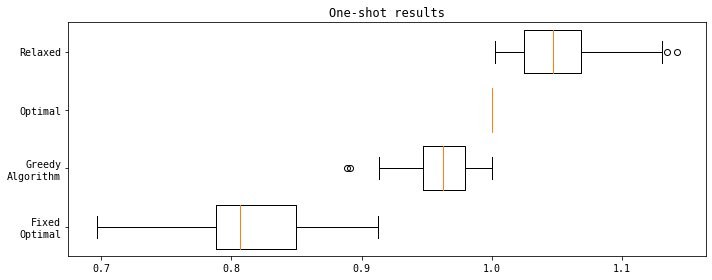

In [24]:
greedy_name = 'Greedy Utility / Sqrt Sum, Product, Pow percent sum'
fixed_greedy_name = 'Greedy Utility / Sqrt Sum, Product, Fixed Task Speeds'

data = [[], [], [], []]
for greedy_result, optimal_result, fixed_result, relaxed_result in zip(
    algorithm_results[greedy_name], algorithm_results['Flexible Optimal'], 
    algorithm_results['Fixed Optimal'], algorithm_results['Server Relaxed Flexible Optimal']):
    if greedy_result['social welfare'] <= optimal_result['social welfare'] and greedy_result['social welfare'] <= relaxed_result['social welfare']:
        data[2].append(1)
        data[0].append(fixed_result['social welfare'] / optimal_result['social welfare'])
        data[3].append(relaxed_result['social welfare'] / optimal_result['social welfare'])
        data[1].append(greedy_result['social welfare'] / optimal_result['social welfare'])
print(f'Data length: {len(data[0])}')

fig, ax_boxplot = plt.subplots(figsize=(10, 4))
ax_boxplot.boxplot(data, vert=False, widths=0.75)
ax_boxplot.set_yticklabels(['Fixed\nOptimal', 'Greedy\nAlgorithm', 'Optimal', 'Relaxed'])
ax_boxplot.set_title('One-shot results')
plt.tight_layout()
save_plot('greedy_algorithms', 'greedy')

## Multi-setting results

In [25]:
greedy_name = 'Greedy Utility * deadline / Sqrt Sum, Product, Pow percent sum'
fixed_greedy_name = 'Greedy Utility * deadline / Sqrt Sum, Product, Fixed Task Speeds'

def collect_data(filename, col, ax, with_optimal=True):
    with open(filename) as file:
        results_data = json.load(file)
        
        data = [[], [], [], [], []]
        for model_results in results_data:
            data[4].append(model_results['Server Relaxed Flexible Optimal'][col])
            if with_optimal:
                data[3].append(model_results['Flexible Optimal'][col])
                data[2].append(model_results['Fixed Optimal'][col])
            data[1].append(model_results[greedy_name][col])
            data[0].append(model_results[fixed_greedy_name][col])
    
        ax.boxplot(data, vert=False)

Save file location: figs/greedy/eps/multi_setting_social_welfare.eps
Save file location: figs/greedy/png/multi_setting_social_welfare.png
Save file location: figs/greedy/pdf/multi_setting_social_welfare.pdf


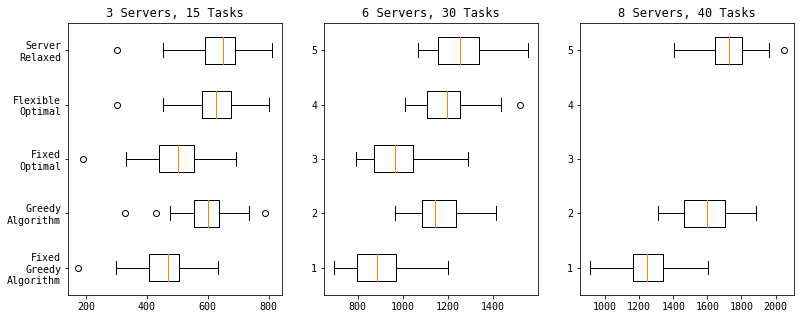

In [26]:
_, (sw_t15_s3_ax, sw_t30_s6_ax, sw_t40_s8_ax) = plt.subplots(1, 3, figsize=(13, 5))
collect_data('../data/greedy_paper_r_t15_s3_dt07-27_08-49-33.json', 'social welfare', sw_t15_s3_ax)
sw_t15_s3_ax.set_title('3 Servers, 15 Tasks')
sw_t15_s3_ax.set_yticklabels(['Fixed\nGreedy\nAlgorithm', 'Greedy\nAlgorithm', 
                              'Fixed\nOptimal', 'Flexible\nOptimal','Server\nRelaxed'])
collect_data('../data/greedy_paper_r_t30_s6_dt07-27_13-24-29.json', 'social welfare', sw_t30_s6_ax)
sw_t30_s6_ax.set_title('6 Servers, 30 Tasks')
collect_data('../data/greedy_paper_r_t40_s8_dt07-26_08-10-07.json', 'social welfare', sw_t40_s8_ax, with_optimal=False)
sw_t40_s8_ax.set_title('8 Servers, 40 Tasks')
save_plot('multi_setting_social_welfare', 'greedy')